In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-inflation-data-1989-2022/Inflation by Month.csv
/kaggle/input/uk-inflation-data-1989-2022/Inflation by Year.csv
/kaggle/input/uk-inflation-data-1989-2022/Inflation by Quarter.csv


In [2]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

## Load Data

In [3]:
month_ifl = pd.read_csv('/kaggle/input/uk-inflation-data-1989-2022/Inflation by Month.csv')
quart_ifl = pd.read_csv('/kaggle/input/uk-inflation-data-1989-2022/Inflation by Quarter.csv')
year_ifl = pd.read_csv('/kaggle/input/uk-inflation-data-1989-2022/Inflation by Year.csv')

## EDA
The porpuse of EDA is to study data using visualisation tools and/or using tranformation and similar techniques.

In [4]:
month_map = {'JAN':1, 
             'FEB':2, 
             'MAR':3,
             'APR':4, 
             'MAY':5, 
             'JUN':6, 
             'JUL':7, 
             'AUG':8, 
             'SEP':9, 
             'OCT':10, 
             'NOV':11, 
             'DEC':12}

quartes = {'Q1':1,
          'Q2':2,
          'Q3':3,
          'Q4':4}

In [5]:
month_ifl['month'] = month_ifl['Month'].apply(lambda x: month_map[x])
quart_ifl['month'] = quart_ifl['Quarter'].apply(lambda x: quartes[x])

In [6]:
month_ifl.astype({'month':int, 'Year':int})
quart_ifl.astype({'month':int, 'Year':int})
year_ifl.astype({'Year':int})

print(month_ifl.dtypes)
print(quart_ifl.dtypes)
print(year_ifl.dtypes)

Year           int64
Month         object
Inflation    float64
month          int64
dtype: object
Year           int64
Quarter       object
Inflation    float64
month          int64
dtype: object
Year           int64
Inflation    float64
dtype: object


In [7]:
month_ifl.drop(['Month'], axis=1, inplace=True)
quart_ifl.drop(['Quarter'], axis=1, inplace=True)

In [8]:
# create date and set day = 1 
month_ifl['date'] = pd.to_datetime(dict(year=month_ifl.Year, 
                                        month=month_ifl.month, 
                                        day = 1))

quart_ifl['date'] = pd.to_datetime(dict(year=quart_ifl.Year, 
                                        month=quart_ifl.month, 
                                        day = 1))

year_ifl['date'] = pd.to_datetime(dict(year=year_ifl.Year,
                                      month = 1,
                                      day = 1))

In [9]:
month_ifl.drop(['Year', 'month'], axis=1, inplace=True)
quart_ifl.drop(['Year', 'month'], axis=1, inplace=True)
year_ifl.drop(['Year'], axis=1, inplace=True)

In [10]:
month_df = month_ifl.sort_values(['date'], ascending = [True])
quart_df = quart_ifl.sort_values(['date'], ascending = [True])
year_df = year_ifl.sort_values(['date'], ascending = [True])

Text(0.5, 1.0, 'Annual inflation')

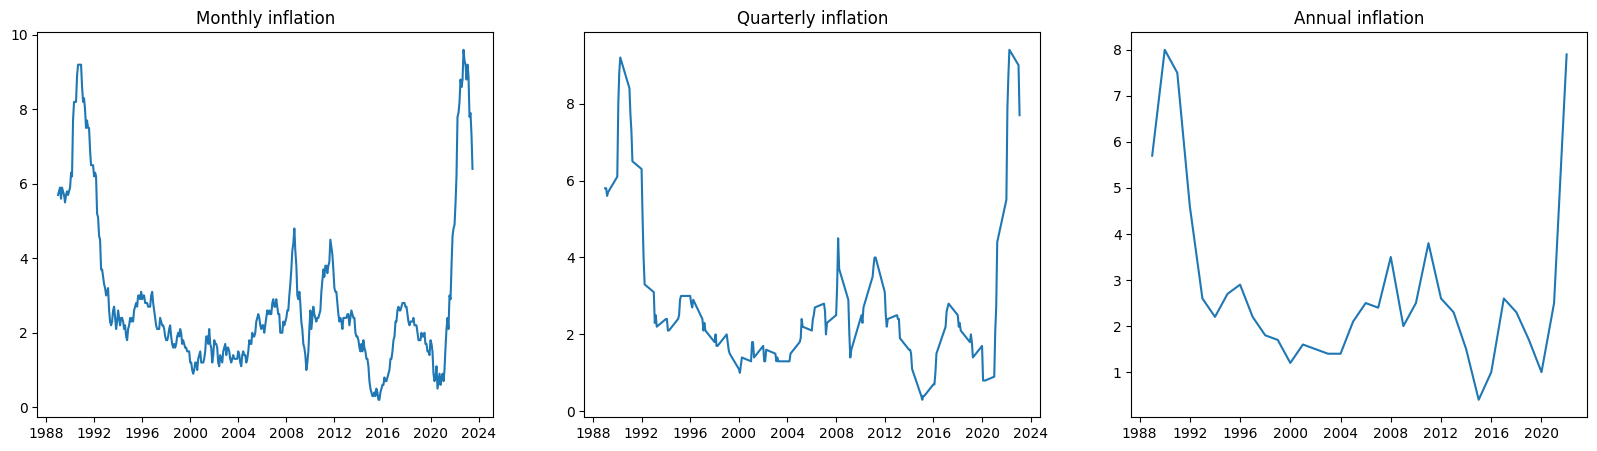

In [11]:
fig, axs = plt.subplots(1,3, figsize = (20, 5))

axs[0].plot(month_ifl.date, month_ifl.Inflation)
axs[0].set_title('Monthly inflation')

axs[1].plot(quart_ifl.date, quart_ifl.Inflation)
axs[1].set_title('Quarterly inflation')


axs[2].plot(year_ifl.date, year_ifl.Inflation)
axs[2].set_title('Annual inflation')

## Check how the monthly and annual inflations are calculated

Text(0.5, 1.0, 'Quarterly Inflation')

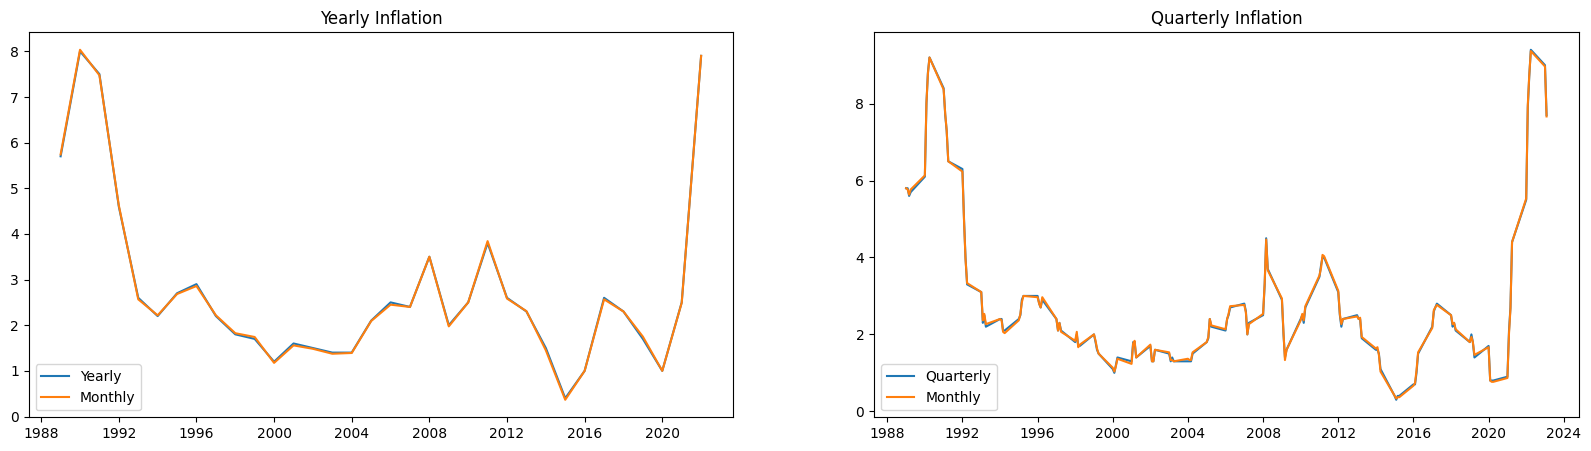

In [12]:
year_moving_average = month_ifl.Inflation.rolling(12).mean().dropna()[::12]
quart_moving_average = month_ifl.Inflation.rolling(3).mean().dropna()[::3]

fig,axs = plt.subplots(1,2, figsize = (20, 5))
axs[0].plot(year_ifl.date, year_ifl.Inflation, label='Yearly')
axs[0].plot(year_ifl.date, year_moving_average, label='Monthly')
axs[0].legend()
axs[0].set_title('Yearly Inflation')

axs[1].plot(quart_ifl.date, quart_ifl.Inflation, label='Quarterly')
axs[1].plot(quart_ifl.date, quart_moving_average, label='Monthly')
axs[1].legend()
axs[1].set_title('Quarterly Inflation')

The Yearly and Quarterly of inflations are calculated using the average value of the monthly inflation hence they are highly correlcated (without showing autocorrelation).

#### Use Dynamic Time Warping to confirm the above
Dynamic time Warping (DTW) allows to compare temporal data independent of their speed. \
An interesting link to have a look: https://towardsdatascience.com/dynamic-time-warping-3933f25fcdd

In [13]:
%%capture
!pip install dtw-python

In [14]:
month_ifl
year_ifl
quart_ifl

,Inflation,date
0,5.8,1989-01-01
1,5.8,1989-02-01
2,5.6,1989-03-01
3,5.7,1989-04-01
4,6.1,1990-01-01
...,...,...
133,7.9,2022-02-01
134,8.7,2022-03-01
135,9.4,2022-04-01
136,9.0,2023-01-01


In [15]:
## Original time-series
query = month_ifl.Inflation

## Reference time-series
template = quart_ifl.Inflation

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: >

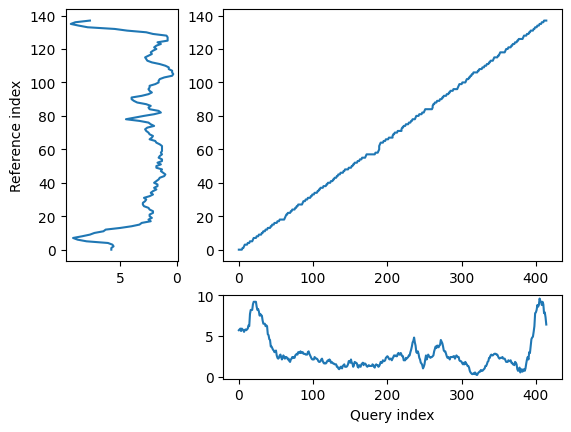

In [16]:
## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

The plot above shows the mapping from the querry to the reference time-series. \
It is shown that the mapping is linear, hence the time-series (though they have unequal shape) are 'identical' in a way, they follow the same pattern in different speeds (more or less).\
Better visualised below.

<Axes: xlabel='Index', ylabel='Query value'>

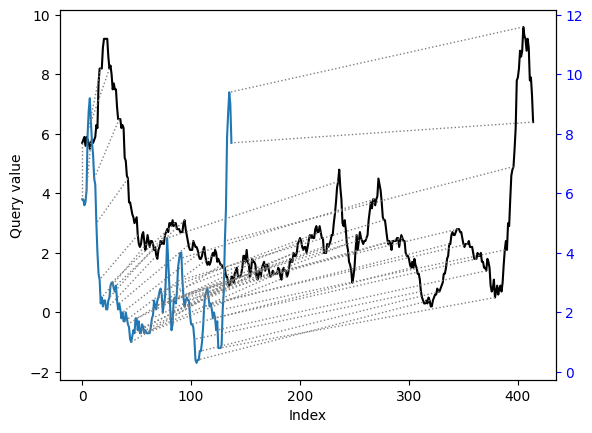

In [17]:
## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, 
    template, 
    keep_internals=True)\
    .plot(type="twoway",offset=-2)

This illustrate the many-to-one (monthly to yearly) matching using no window constraint.

## Model - Facebook Prophet
The model utilizes: y(t) = g(t) + s(t) + h(t) + $\epsilon_{t}$ where, 

* g(t) is growth
* s(t) is seasonality
* h(t) is holiday
* $\epsilon_{t}$ is error 

Check out this amazing article for more details: https://towardsdatascience.com/time-series-analysis-with-facebook-prophet-how-it-works-and-how-to-use-it-f15ecf2c0e3a. \
The benefit of Facebook Prophet, is that it allows to fit a great model and plot graphs about different features of the time-series that can provide insights. Also, it is super easy to use and it can detect change-points and incorporate events such as holidays for better fitting and inference.

In [18]:
%%caprture
! pip install prophet

UsageError: Cell magic `%%caprture` not found.


Split data to train-test

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
month_ifl.head()

In [ ]:
temp_month = month_ifl.rename(columns={'Inflation':'y', 'date':'ds'})
train, test = train_test_split(temp_month, test_size=0.2, random_state=None, shuffle=False)

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet(weekly_seasonality=False, n_changepoints=9)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train)

In [ ]:
# make test.shape[0] future predictions
future = model.make_future_dataframe(periods=test.shape[0], freq='MS')
print(future.shape[0]) # future.shape[0] = train.shape[0] + test.shape[0]

In [ ]:
# forecasted values
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# make plots
from prophet.plot import add_changepoints_to_plot

fig1 = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.plot(test['ds'], test['y'], '.', color='red', label='test data')
plt.legend()

In [ ]:
# component plot
fig2 = model.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [ ]:
mape_score = mape(test.y, forecast.loc[train.shape[0]:, 'yhat'])
wmape_score = wmape(test.y, forecast.loc[train.shape[0]:, 'yhat'])
print('MAPE score: {}'.format(mape_score))
print('WMAPE score: {}'.format(wmape_score))